In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
from matplotlib import pyplot as plt
from sklearn.model_selection import cross_val_score

from sklearn import metrics
from collections import Counter


In [3]:
raw_df = pd.read_csv('drive/MyDrive/STT811 Project/fraudTrain.csv')


In [4]:
raw_df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [5]:
labels=["Genuine","Fraud"]

fraud_or_not = raw_df["is_fraud"].value_counts().tolist()
values = [fraud_or_not[0], fraud_or_not[1]]

fig = px.pie(values=raw_df['is_fraud'].value_counts(), names=labels , width=700, height=400, color_discrete_sequence=["skyblue","black"]
             ,title="Fraud vs Genuine transactions")
fig.show()

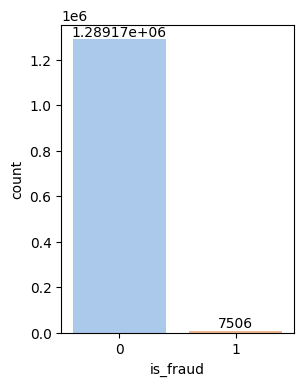

In [6]:
plt.figure(figsize=(3,4))
ax = sns.countplot(x='is_fraud',data=raw_df,palette="pastel")
for i in ax.containers:
    ax.bar_label(i,)


In [7]:
print('Genuine:', round(raw_df['is_fraud'].value_counts()[0]/len(raw_df) * 100,2), '% of the dataset')
print('Frauds:', round(raw_df['is_fraud'].value_counts()[1]/len(raw_df) * 100,2), '% of the dataset')


Genuine: 99.42 % of the dataset
Frauds: 0.58 % of the dataset


In [8]:
df = raw_df.copy()


In [9]:
df.drop_duplicates()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,...,37.7175,-112.4777,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0
1296671,1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,...,39.2667,-77.5101,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0
1296672,1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,...,32.9396,-105.8189,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0
1296673,1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,...,43.3526,-102.5411,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0


In [10]:
df = raw_df.copy()

df.drop_duplicates(inplace=True)
print("Duplicated values dropped succesfully")
print("*" * 100)


Duplicated values dropped succesfully
****************************************************************************************************


In [11]:
df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [12]:
from datetime import datetime

cols = df.columns

'''Step-1: Segragating data-time, categorical, numerical, and output features and removing  
Nominal, meaning less, complicated ones '''
date_features = [cols[1], cols[19]]
cat_features = [cols[2], cols[4], cols[8], cols[10], cols[11], cols[12], cols[16]]
num_features = [cols[5], cols[13], cols[14], cols[15], cols[17], cols[20], cols[21]  ]
output_features = [cols[22]]

# Concatenate the feature lists into a single list
all_features = date_features + cat_features + num_features + output_features
df =  df[all_features]
print(all_features)

train_dt =  df[all_features]

train_dt.columns

(train_dt).isna().sum()

train_dt.dtypes

from math import sin, cos, sqrt, atan2, radians


['trans_date_trans_time', 'unix_time', 'cc_num', 'category', 'gender', 'city', 'state', 'zip', 'job', 'amt', 'lat', 'long', 'city_pop', 'dob', 'merch_lat', 'merch_long', 'is_fraud']


In [13]:
def haversine(lat1, lon1, lat2, lon2):
    R = 3958.8  # Earth radius in miles

    # Convert latitude and longitude from degrees to radians
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])

    # Calculate the distance using the Haversine formula
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    distance = R * c

    return distance

def new_features(data):
    df = data.copy()
    df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
    df['trans_date'] = df['trans_date_trans_time'].dt.date
    df['day_of_week'] = df['trans_date_trans_time'].dt.day_name()
    df['trans_hour'] = df['trans_date_trans_time'].dt.hour
    df['avg_category_amt'] = df.groupby('category')['amt'].transform('mean')
    df['amt_above_avg_category_amt'] = (df['amt'] > df['avg_category_amt']).astype(int)
    df = df.sort_values(['cc_num', 'trans_date_trans_time'], ascending=[True, True])
    df['time_since_last_trans'] = df.groupby('cc_num')['trans_date_trans_time'].diff().dt.total_seconds()
    df['trans_freq'] = df.groupby('cc_num')['trans_date_trans_time'].transform('count')
    df['time_since_last_trans'] = df.groupby('cc_num')['trans_date_trans_time'].transform(lambda x: x.max() - x)
    df = df.sort_index()
    df['distance'] = df.apply(lambda row: haversine(row['lat'], row['long'], row['merch_lat'], row['merch_long']), axis=1)
    df['time_since_last_trans'] = df['time_since_last_trans'].dt.total_seconds()
    df['days_since_last_trans'], df['hours_since_last_trans'] = divmod(df['time_since_last_trans'], 86400)
    df['hours_since_last_trans'] /= 3600
    df['days_since_last_trans'] = df['days_since_last_trans'].astype(int)
    df['hours_since_last_trans'] = df['hours_since_last_trans'].astype(int)
    train_dt['dob'] = train_dt['dob'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))
    date  = pd.to_datetime(df['trans_date'])
    df['age']    = ( date- train_dt['dob']).dt.days.astype(int)
    return df


engineered_data_train = pd.DataFrame()
engineered_data_train = new_features(train_dt)

engineered_data_train.head(10)

engineered_data_train.columns

# Drop irrelevant columns
engineered_data_train = engineered_data_train.drop(['trans_date_trans_time', 'unix_time', 'cc_num','city', 'zip', 'lat', 'long', 'merch_lat', 'merch_long','avg_category_amt','dob'], axis=1)


# define a function to encode time difference into categories
def encode_time_diff(time_diff):
    if time_diff <= pd.Timedelta(weeks=8):
        return 'recent'
    elif time_diff <= pd.Timedelta(weeks=20):
        return 'moderate'
    else:
        return 'long ago'

def encode_features(data):
    df = data.copy()
    region_dict = {'AL': 'South', 'AK': 'West', 'AZ': 'West', 'AR': 'South',
                     'CA': 'West', 'CO': 'West', 'CT': 'Northeast', 'DE': 'South',
                     'FL': 'South', 'GA': 'South', 'HI': 'Pacific','DC':'Northeast', 'ID': 'West',
                     'IL': 'Midwest', 'IN': 'Midwest', 'IA': 'Midwest', 'KS': 'Midwest',
                     'KY': 'South', 'LA': 'South', 'ME': 'Northeast', 'MD': 'South',
                     'MA': 'Northeast', 'MI': 'Midwest', 'MN': 'Midwest', 'MS': 'South',
                     'MO': 'Midwest', 'MT': 'West', 'NE': 'Midwest', 'NV': 'West',
                     'NH': 'Northeast', 'NJ': 'Northeast', 'NM': 'West', 'NY': 'Northeast',
                     'NC': 'South', 'ND': 'Midwest', 'OH': 'Midwest', 'OK': 'South',
                     'OR': 'West', 'PA': 'Northeast', 'RI': 'Northeast', 'SC': 'South',
                     'SD': 'Midwest', 'TN': 'South', 'TX': 'South', 'UT': 'West',
                     'VT': 'Northeast', 'VA': 'South', 'WA': 'West', 'WV': 'South',
                     'WI': 'Midwest', 'WY': 'West'}
    
    week_dict = {'Monday': 'weekday', 
                 'Tuesday': 'weekday', 
                 'Wednesday': 'weekday', 
                 'Thursday': 'weekday', 
                 'Friday': 'weekday',
               'Saturday': 'weekend',
                'Sunday': 'weekend'}
    df['day_of_week'] = df['day_of_week'].map(week_dict)
    
    # Use the dictionary to map the states to their regions
    df['region'] = df['state'].map({state: region for region, states in region_dict.items() for state in states})

    df['region'] = df['state'].map(region_dict)
    df['gender'] = df['gender'].map({'F': 0, 'M': 1})
    df['category'] = pd.factorize(df['category'])[0]
    df['trans_date'] = pd.to_datetime(df['trans_date'])
    RN_date = datetime.now()
    df['time_diff'] = (RN_date - df['trans_date'])
    df['trans_date_encoded'] = df['time_diff'].apply(encode_time_diff)
    # create bins for the different times of day
    bins = [0, 12, 18, 24]
    labels = ['morning', 'afternoon', 'evening']
    # use the cut() function to encode the 'trans_time_of_day' column
    df['trans_hour'] = pd.cut(pd.to_datetime(df['trans_hour']).dt.hour, bins=bins, labels=labels, include_lowest=True)
    return df

encoded_engineered_data_train = pd.DataFrame()
encoded_engineered_data_train = encode_features(engineered_data_train)
# drop: state, job, time_diff, trans_date
#encoded_engineered_data = encoded_engineered_data.drop(['state', 'job', 'time_diff','trans_date'],axis=1)

encoded_engineered_data_train = encoded_engineered_data_train.drop(['state', 'job', 'time_diff','trans_date'],axis=1)

(encoded_engineered_data_train).isna().sum()

encoded_engineered_data_train["region"].unique()

encoded_engineered_data_train.head(10)

encoded_engineered_data_train.dtypes


dummy = encoded_engineered_data_train.copy()

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

dummy['day_of_week'] = le.fit_transform(dummy['day_of_week'])
dummy['trans_hour'] = le.fit_transform(dummy['trans_hour'])
dummy['region'] = le.fit_transform(dummy['region'])
dummy['time_since_last_trans'] = le.fit_transform(dummy['time_since_last_trans'])
dummy['days_since_last_trans'] = le.fit_transform(dummy['days_since_last_trans'])
dummy['hours_since_last_trans'] = le.fit_transform(dummy['hours_since_last_trans'])
dummy['trans_date_encoded'] = le.fit_transform(dummy['trans_date_encoded'])

In [14]:
dummy.head()

,category,gender,amt,city_pop,is_fraud,day_of_week,trans_hour,amt_above_avg_category_amt,time_since_last_trans,trans_freq,distance,days_since_last_trans,hours_since_last_trans,age,region,trans_date_encoded
0,0,0,4.97,3495,0,0,0,0,1274980,2028,48.838809,537,6,11255,3,0
1,1,0,107.23,149,0,0,0,0,1275065,3030,18.773185,537,7,14804,4,0
2,2,1,220.11,4154,0,0,0,1,1273151,503,67.236892,536,7,20801,4,0
3,3,1,45.00,1939,0,0,0,0,1271597,493,59.449252,535,1,18982,4,0
4,4,1,41.96,99,0,0,0,0,1274854,2017,48.192064,537,3,11967,3,0


In [15]:
X = dummy.drop('is_fraud', axis=1)
y = dummy['is_fraud']

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size = 0.3, random_state = 42)

In [17]:
from sklearn.preprocessing import StandardScaler

# Creating function for scaling
def Standard_Scaler (df, col_names):
    features = df[col_names]
    scaler = StandardScaler().fit(features.values)
    features = scaler.transform(features.values)
    df[col_names] = features
    
    return df
X_train = Standard_Scaler (X_train, X_train.columns)
X_test = Standard_Scaler (X_test, X_train.columns)

# Modelling

In [18]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential()

# https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw

model.add(Dense(units=29,activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(units=14,activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(units=7,activation='relu'))
#model.add(Dropout(0.1))

model.add(Dense(units=2,activation='relu'))

model.add(Dense(units=1,activation='sigmoid'))

# For a binary classification problem
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=[tf.keras.metrics.FalsePositives(),'accuracy'])

early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=2, patience=35)


In [19]:

# model.fit(x=X_train, 
#           y=y_train, 
#           epochs=3000,
#           validation_data=(X_test, y_test), verbose=2,
#           callbacks=[early_stop]
#           )



In [20]:
!pip install imblearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [21]:
from imblearn.over_sampling import RandomOverSampler
# define oversampling strategy
ros = RandomOverSampler(random_state=42)
# fit and apply the transform
X_over, y_over = ros.fit_resample(X_train, y_train)
print('Genuine:', y_over.value_counts()[0], '/', round(y_over.value_counts()[0]/len(y_over) * 100,2), '% of the dataset')
print('Frauds:', y_over.value_counts()[1], '/',round(y_over.value_counts()[1]/len(y_over) * 100,2), '% of the dataset')


Genuine: 902418 / 50.0 % of the dataset
Frauds: 902418 / 50.0 % of the dataset


In [23]:
model.fit(x=X_over, 
          y=y_over, 
          epochs=50,
          validation_data=(X_test, y_test), verbose=2,
          batch_size = 50000,
          callbacks=[early_stop]
          )



Epoch 1/50
37/37 - 5s - loss: 0.3587 - false_positives: 57998.0000 - accuracy: 0.8505 - val_loss: 0.2976 - val_false_positives: 15125.0000 - val_accuracy: 0.9598 - 5s/epoch - 139ms/step
Epoch 2/50
37/37 - 9s - loss: 0.3495 - false_positives: 53497.0000 - accuracy: 0.8546 - val_loss: 0.2896 - val_false_positives: 14197.0000 - val_accuracy: 0.9622 - 9s/epoch - 245ms/step
Epoch 3/50
37/37 - 6s - loss: 0.3425 - false_positives: 49887.0000 - accuracy: 0.8579 - val_loss: 0.2833 - val_false_positives: 13548.0000 - val_accuracy: 0.9639 - 6s/epoch - 160ms/step
Epoch 4/50
37/37 - 5s - loss: 0.3370 - false_positives: 47245.0000 - accuracy: 0.8597 - val_loss: 0.2792 - val_false_positives: 13303.0000 - val_accuracy: 0.9645 - 5s/epoch - 132ms/step
Epoch 5/50
37/37 - 6s - loss: 0.3324 - false_positives: 46495.0000 - accuracy: 0.8612 - val_loss: 0.2768 - val_false_positives: 13404.0000 - val_accuracy: 0.9643 - 6s/epoch - 166ms/step
Epoch 6/50
37/37 - 5s - loss: 0.3287 - false_positives: 46039.0000 - a

<Axes: >

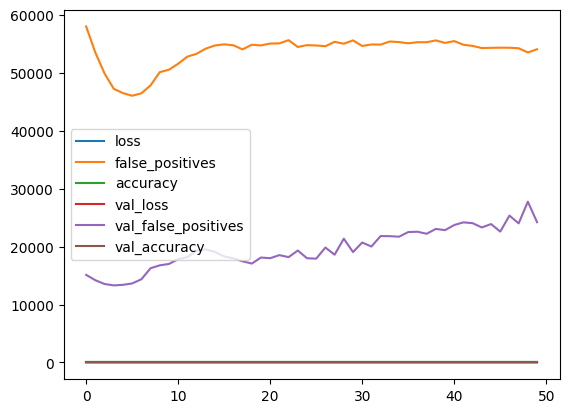

In [24]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()


In [25]:
over_predictions_2nd = (model.predict(X_test) > 0.5)*1


12157/12157 [==============================] - 35s 3ms/step


In [26]:
from sklearn.metrics import classification_report,confusion_matrix,recall_score,precision_score,f1_score,accuracy_score
print(classification_report(y_test,over_predictions_2nd))


              precision    recall  f1-score   support

           0       1.00      0.94      0.97    386751
           1       0.08      0.92      0.14      2252

    accuracy                           0.94    389003
   macro avg       0.54      0.93      0.56    389003
weighted avg       0.99      0.94      0.96    389003



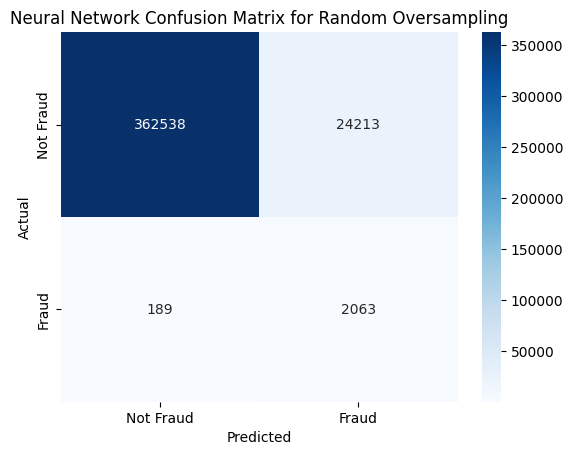

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Create confusion matrix
cf_matrix = confusion_matrix(y_test, over_predictions_2nd)

labels = ['Not Fraud', 'Fraud']

# Plot confusion matrix
sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels)
plt.title('Neural Network Confusion Matrix for Random Oversampling')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [29]:
over_nn_cm = confusion_matrix(y_test, over_predictions_2nd)

over_nn_rf_Recall = recall_score(y_test, over_predictions_2nd)
over_nn_rf_Precision = precision_score(y_test, over_predictions_2nd)
over_nn_rf_f1 = f1_score(y_test, over_predictions_2nd)
over_nn_rf_accuracy = accuracy_score(y_test, over_predictions_2nd)

print(over_nn_cm)


[[362538  24213]
 [   189   2063]]


In [61]:
ndf = [(over_nn_rf_Recall, over_nn_rf_Precision, over_nn_rf_f1, over_nn_rf_accuracy)]

over_nn_score = pd.DataFrame(data = ndf, columns=['Recall','Precision','F1 Score', 'Accuracy'])
over_nn_score.insert(0, 'Neural Network with', 'Oversampling')
over_nn_score


,Neural Network with,Recall,Precision,F1 Score,Accuracy
0,Oversampling,0.916075,0.078513,0.14463,0.93727


In [31]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential()

# https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw

model.add(Dense(units=29,activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(units=14,activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(units=7,activation='relu'))
#model.add(Dropout(0.1))

model.add(Dense(units=2,activation='relu'))

model.add(Dense(units=1,activation='sigmoid'))

# For a binary classification problem
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=[tf.keras.metrics.FalsePositives()])

early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=2, patience=35)


In [32]:
from imblearn.pipeline import Pipeline, make_pipeline
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)

In [33]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=50,
          validation_data=(X_test, y_test), verbose=2,
          batch_size = 50000,
          callbacks=[early_stop]
          )



Epoch 1/50
37/37 - 10s - loss: 0.6972 - false_positives_1: 271090.0000 - val_loss: 0.6086 - val_false_positives_1: 84601.0000 - 10s/epoch - 270ms/step
Epoch 2/50
37/37 - 8s - loss: 0.5937 - false_positives_1: 165120.0000 - val_loss: 0.4249 - val_false_positives_1: 28926.0000 - 8s/epoch - 203ms/step
Epoch 3/50
37/37 - 5s - loss: 0.4833 - false_positives_1: 92178.0000 - val_loss: 0.3290 - val_false_positives_1: 15900.0000 - 5s/epoch - 130ms/step
Epoch 4/50
37/37 - 6s - loss: 0.4167 - false_positives_1: 63288.0000 - val_loss: 0.3127 - val_false_positives_1: 11941.0000 - 6s/epoch - 164ms/step
Epoch 5/50
37/37 - 5s - loss: 0.3897 - false_positives_1: 48840.0000 - val_loss: 0.3060 - val_false_positives_1: 10895.0000 - 5s/epoch - 135ms/step
Epoch 6/50
37/37 - 3s - loss: 0.3735 - false_positives_1: 41885.0000 - val_loss: 0.2986 - val_false_positives_1: 10433.0000 - 3s/epoch - 88ms/step
Epoch 7/50
37/37 - 2s - loss: 0.3608 - false_positives_1: 38839.0000 - val_loss: 0.2894 - val_false_positives

<Axes: >

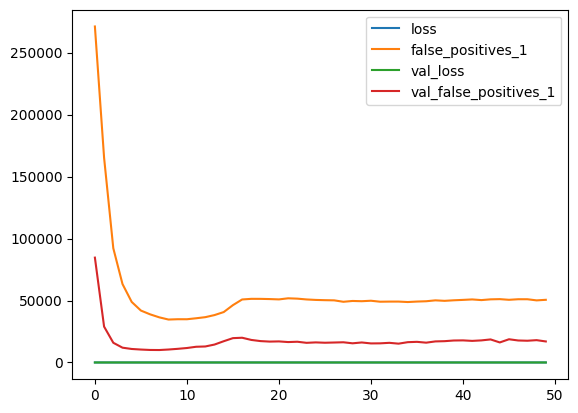

In [34]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()


In [35]:
smote_y_pred = model.predict(X_test)

12157/12157 [==============================] - 21s 2ms/step


In [36]:
smote_y_pred = (smote_y_pred > 0.5)*1


In [37]:
from sklearn.metrics import classification_report,confusion_matrix,recall_score,precision_score,f1_score,accuracy_score
print(classification_report(y_test,smote_y_pred))


              precision    recall  f1-score   support

           0       1.00      0.96      0.98    386751
           1       0.11      0.89      0.19      2252

    accuracy                           0.96    389003
   macro avg       0.55      0.92      0.58    389003
weighted avg       0.99      0.96      0.97    389003



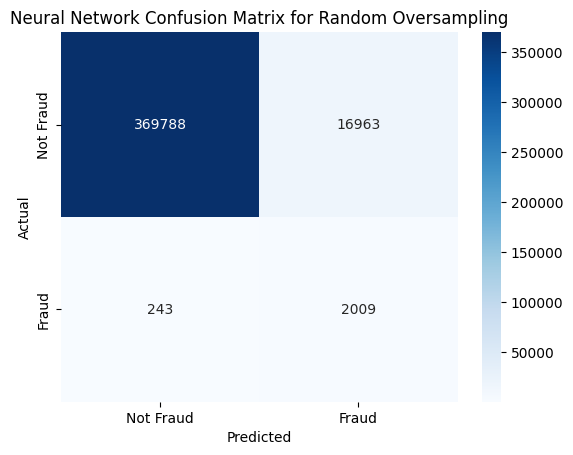

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Create confusion matrix
cf_matrix = confusion_matrix(y_test, smote_y_pred)

labels = ['Not Fraud', 'Fraud']

# Plot confusion matrix
sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels)
plt.title('Neural Network Confusion Matrix for Random Oversampling')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [39]:
smote_nn_cm = confusion_matrix(y_test, smote_y_pred)

smote_nn_rf_Recall = recall_score(y_test, smote_y_pred)
smote_nn_rf_Precision = precision_score(y_test, smote_y_pred)
smote_nn_rf_f1 = f1_score(y_test, smote_y_pred)
smote_nn_rf_accuracy = accuracy_score(y_test, smote_y_pred)

print(smote_nn_cm)


[[369788  16963]
 [   243   2009]]


In [54]:
ndf = [(smote_nn_rf_Recall, smote_nn_rf_Precision, smote_nn_rf_f1, smote_nn_rf_accuracy)]

smote_nn_score = pd.DataFrame(data = ndf, columns=['Recall','Precision','F1 Score', 'Accuracy'])
smote_nn_score.insert(0, 'Neural Network with', 'SMOTE Oversampling')
smote_nn_score


,Neural Network with,Recall,Precision,F1 Score,Accuracy
0,SMOTE Oversampling,0.892096,0.105893,0.189314,0.955769


In [41]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks

SMOTETomek_ = SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'))


In [43]:
X_train, y_train = SMOTETomek_.fit_resample(X_train, y_train)


In [44]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential()

# https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw

model.add(Dense(units=29,activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(units=14,activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(units=7,activation='relu'))
#model.add(Dropout(0.1))

model.add(Dense(units=2,activation='relu'))

model.add(Dense(units=1,activation='sigmoid'))

# For a binary classification problem
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=[tf.keras.metrics.FalsePositives()])

early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=2, patience=35)


In [45]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=50,
          validation_data=(X_test, y_test), verbose=2,
          batch_size = 50000,
          callbacks=[early_stop]
          )



Epoch 1/50
37/37 - 5s - loss: 0.6638 - false_positives_2: 333061.0000 - val_loss: 0.7259 - val_false_positives_2: 115230.0000 - 5s/epoch - 144ms/step
Epoch 2/50
37/37 - 2s - loss: 0.5493 - false_positives_2: 250578.0000 - val_loss: 0.6765 - val_false_positives_2: 33135.0000 - 2s/epoch - 68ms/step
Epoch 3/50
37/37 - 2s - loss: 0.4825 - false_positives_2: 104232.0000 - val_loss: 0.4829 - val_false_positives_2: 13551.0000 - 2s/epoch - 66ms/step
Epoch 4/50
37/37 - 2s - loss: 0.4271 - false_positives_2: 58229.0000 - val_loss: 0.3649 - val_false_positives_2: 12180.0000 - 2s/epoch - 66ms/step
Epoch 5/50
37/37 - 4s - loss: 0.4002 - false_positives_2: 51759.0000 - val_loss: 0.3234 - val_false_positives_2: 11771.0000 - 4s/epoch - 110ms/step
Epoch 6/50
37/37 - 4s - loss: 0.3832 - false_positives_2: 50972.0000 - val_loss: 0.2974 - val_false_positives_2: 10961.0000 - 4s/epoch - 118ms/step
Epoch 7/50
37/37 - 3s - loss: 0.3706 - false_positives_2: 50120.0000 - val_loss: 0.2823 - val_false_positives_2

<Axes: >

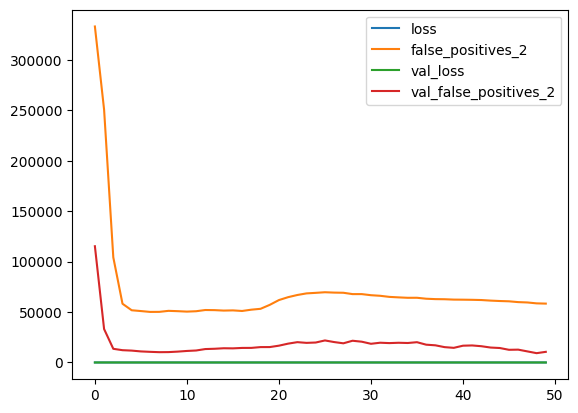

In [46]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()


In [47]:
smot_tomek_y_pred = model.predict(X_test)

12157/12157 [==============================] - 21s 2ms/step


In [48]:
smot_tomek_y_pred = (smot_tomek_y_pred > 0.5)*1


In [49]:
from sklearn.metrics import classification_report,confusion_matrix,recall_score,precision_score,f1_score,accuracy_score
print(classification_report(y_test,smot_tomek_y_pred))


              precision    recall  f1-score   support

           0       1.00      0.97      0.99    386751
           1       0.16      0.88      0.27      2252

    accuracy                           0.97    389003
   macro avg       0.58      0.93      0.63    389003
weighted avg       0.99      0.97      0.98    389003



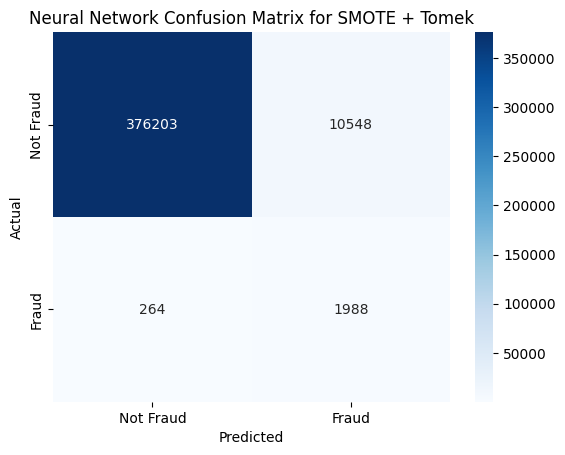

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Create confusion matrix
cf_matrix = confusion_matrix(y_test, smot_tomek_y_pred)

labels = ['Not Fraud', 'Fraud']

# Plot confusion matrix
sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels)
plt.title('Neural Network Confusion Matrix for SMOTE + Tomek')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [51]:
smot_tomek_nn_cm = confusion_matrix(y_test, smot_tomek_y_pred)

smot_tomek_nn_rf_Recall = recall_score(y_test, smot_tomek_y_pred)
smot_tomek_nn_rf_Precision = precision_score(y_test, smot_tomek_y_pred)
smot_tomek_nn_rf_f1 = f1_score(y_test, smot_tomek_y_pred)
smot_tomek_nn_rf_accuracy = accuracy_score(y_test, smot_tomek_y_pred)

print(smot_tomek_nn_cm)


[[376203  10548]
 [   264   1988]]


In [59]:
ndf = [(smot_tomek_nn_rf_Recall, smot_tomek_nn_rf_Precision, smot_tomek_nn_rf_f1, smot_tomek_nn_rf_accuracy)]

SMOTETomek_nn_score = pd.DataFrame(data = ndf, columns=['Recall','Precision','F1 Score', 'Accuracy'])
SMOTETomek_nn_score.insert(0, 'Neural Network with', 'SMOTE + Tomek')
SMOTETomek_nn_score


,Neural Network with,Recall,Precision,F1 Score,Accuracy
0,SMOTE + Tomek,0.882771,0.158583,0.268867,0.972206


In [62]:
predictions = pd.concat([over_nn_score, smote_nn_score, SMOTETomek_nn_score], ignore_index=True, sort=False)
predictions.sort_values(by=['Recall'], ascending=False)


,Neural Network with,Recall,Precision,F1 Score,Accuracy
0,Oversampling,0.916075,0.078513,0.144630,0.937270
1,SMOTE Oversampling,0.892096,0.105893,0.189314,0.955769
2,SMOTE + Tomek,0.882771,0.158583,0.268867,0.972206
